In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Gridworld example
# h, w = 5, 5 # height and width of grid

class Gridworld():
    def __init__(self, h, w):
        self.h = h
        self.w = w
        self.states = [(i,j) for i in range(h) for j in range(w)]
        self.actions = ['l', 'r', 'u', 'd']
        self.gamma = 0.9 # discount factor
        # print("Gridworld example")
        # print('Set of States:', self.states)
        # print("Set of Actions:", self.actions)
        # Q-values
        # self.Q = np.zeros((h,w,len(self.actions)))
        # print(Q)
        # Values
        # self.V = np.zeros((h,w))        
        # Policy grid
        # self.Pi = np.full((h,w), '', dtype=object)
        self.visited = []

    def transition(self, s, a): # Transition function 
        if a=='l': # left
            sp = (s[0], s[1]-1) if (s[1]>0) else s
            return sp
        elif a=='r': # right
            sp = (s[0], s[1]+1) if (s[1]<(self.w-1)) else s
            return sp
        elif a=='u': # up
            sp = (s[0]-1, s[1]) if (s[0]>0) else s
            return sp
        elif a=='d': # down
            sp = (s[0]+1, s[1]) if (s[0]<(self.h-1)) else s
        self.visited.append(sp)
        return sp

    def reward(self, s, a): # Reward function
        sp = self.transition(s,a) # next state
        if sp in self.visited:
            return -0.5
        if s==sp:
            return -1
        else:
            return 0

grid = Gridworld(5,5)

# Testing transitions
a1 = grid.transition((0,0), 'r')
a2 = grid.transition((0,0), 'l')
a3 = grid.transition((0,0), 'u')
a4 = grid.transition((0,0), 'd')
print("transitions from (0,0):",a1,a2,a3,a4)

# Testing rewards
r1 = grid.reward((0,0), 'l')
r2 = grid.reward((0,0), 'r')
r3 = grid.reward((0,0), 'u')
r4 = grid.reward((0,0), 'd')
print("rewards from (0,0):", r1,r2,r3,r4)

transitions from (0,0): (0, 1) (0, 0) (0, 0) (1, 0)
rewards from (0,0): -1 0 -1 -0.5


In [43]:
# A nice function for plotting policy arrows!
def plot_policy_arrows(pi, pi_title):
    l = len(pi)
    arrows = {"r":[(1,0)], 
            "l":[(-1,0)],
            "u":[(0,1)],
            "d":[(0,-1)],          
            "dlru":[(-1,0), (0,1), (0,-1),(1,0)],
            "lu":[(-1,0), (0,1)],
            "lr":[(-1,0), (1,0)],
            "ru":[(1,0),(0,1)],
            "dl":[(-1,0),(0,-1)],
            "dr":[(1,0),(0,-1)],
            "None":[(0,0)]}
    scale = 0.25
    fig, ax = plt.subplots(figsize=(6, 6))
    for r, row in enumerate(pi):
        for c, cell in enumerate(row):
            for v in arrows[cell]:
                plt.arrow(c, l-r, scale*v[0], scale*v[1], head_width=0.1)
    ax.set_title("Policy matrix for policy: "+str(pi_title))

In [44]:
# Plotting policy matrix
def policy_matrix(example, pi):
        P = np.full((example.h, example.w),'', dtype=object)
        # print(Pi)
        for i in range(example.h):
            for j in range(example.w):
                p = example.policy((i,j), pi)
                for a in example.actions:            
                    if p[a]:
                        P[i,j] += a
                P[i,j] = ''.join(sorted(P[i,j]))
        return P

In [45]:
x = np.array([[0,0], [1,2]])
y = np.array([1,2])
x[1] += y
print(x)

[[0 0]
 [2 4]]


In [46]:
# Value evaluation algorithm from chapter 4
h, w = 4, 4

def value_iteration(example, th):
    V = np.zeros((example.h,example.w))
    Pi = np.full((example.h,example.w), '', dtype=object) # An empty policy which needs to be updated
    k = 0
    Qs = np.zeros((1000, example.h, example.w, 4))
    for t in range(1,1000):
        delta = 0
        for s in example.states:
            i, j = s
            Q = [] # Queue values
            v = V[i,j]
            for a in example.actions:
                sp = example.transition(s,a)
                r = example.reward(s,a)
                ip, jp = sp
                Q += 1 * [r + example.gamma * V[ip, jp]] # Add the queue values
            Qs[t,i,j] += np.array(Q)
            # print(Q)
            V[i,j] = max(Qs[t,i,j]) #round(max(Q), 2)
            delta = max(delta, abs(v - V[i,j]))
        # if delta < th:
        #     print('k:', k)
        #     break
        k += 1

    # Policy extraction
    for s in example.states:
        i, j = s        
        values_and_actions = []
        for a in example.actions:
            sp = example.transition(s,a)
            r = example.reward(s,a)
            ip, jp = sp
            Qa = r + example.gamma * V[ip, jp]
            values_and_actions.append([Qa, a])
        values_and_actions.sort() # sort based on the Q-values
        # print(values_and_actions)
        max_v = values_and_actions[-1][0]
        for (v1,a1) in values_and_actions:
            if v1 == max_v:
                Pi[i,j] += a1
    
    return Qs, V, Pi



The optimal value function V:
[[ 0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.   ]
 [-0.5   -0.5   -0.5   -0.5   -0.5  ]
 [-0.95  -0.95  -0.95  -0.95  -0.95 ]
 [-1.355 -1.355 -1.355 -1.355 -1.355]]


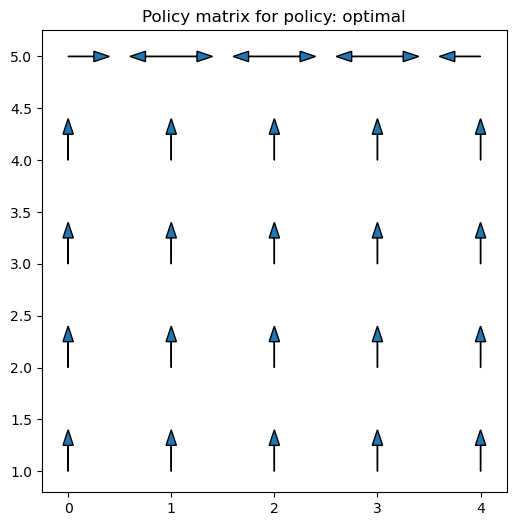

In [47]:
# testing value iteration for chapter 3
grid = Gridworld(5,5)
th = 0.01

# Experiment 1
# pi1 = 'all_equal'
Qs, V, PI = value_iteration(grid, th)
print("The optimal value function V:")
print(V)
plot_policy_arrows(PI, 'optimal')
plt.show()

In [48]:
for i in range(10):
    print(Qs[i])

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
[[[-1.    0.   -1.   -0.5 ]
  [ 0.    0.   -1.   -0.5 ]
  [ 0.    0.   -1.   -0.5 ]
  [ 0.    0.   -1.   -0.5 ]
  [ 0.   -1.   -1.   -0.5 ]]

 [[-0.5  -0.5   0.   -0.5 ]
  [-0.5  -0.5   0.   -0.5 ]
  [-0.5  -0.5   0.   -0.5 ]
  [-0.5  -0.5   0.   -0.5 ]
  [-0.5  -0.5   0.   -0.5 ]]

 [[-0.5  -0.5  -0.5  -0.5 ]
  [-0.95 -0.5  -0.5  -0.5 ]
  [-0.95 -0.5  -0.5  -0.5 ]
  [-0.95 -0.5  -0.5  -0.5 ]
  [-0.95 -0.5  -0.5  -0.5 ]]

 [[-0.5  -0.5  -0.95 -0.5 ]
  [-0.95 -0.5  -0.95 -0.5 ]
  [-0.95 -0.5  -0.95 -0.5 ]
  [-0.95 -0.5  -0.95 -0.5 ]
  [-0.95 -0.5  -0.95 -0.5 ]]

 [[-0.5  -0.5  -0.95 -